In [20]:
print("Olá mundo!")

Olá mundo!


In [16]:
from openpyxl import Workbook, worksheet
from openpyxl.styles import Border, PatternFill, Side, Alignment, Font
from datetime import date, timedelta

# Create a new workbook
wb = Workbook()
ws = wb.active
ws.title = "Folha_Cert"

# Sample data (replace with your actual data)
data = [
    ["Data Subscribe","Value Subscribe","Data Renew","Debs Tax","Recover"],
    [date(2022, 12, 28), 100, 0, 0.0284,"TRUE" ],
    ["06/01/2023",4000, '06/04/2023', 0.0309,"TRUE" ],
    ["23/01/2023",1100, '23/04/2023', 0.0309,"TRUE" ],
    ["06/03/2023",2000, '06/06/2023', 0.0350,"TRUE" ],
    ["22/05/2023",2000, '22/08/2023', 0.0350,"TRUE" ],
    ["31/07/2023",3000, '31/10/2023', 0.0275,"TRUE" ],
    ["25/09/2023",2500, '25/12/2023', 0.0275,"TRUE" ],
    ["01/02/2024",3000, '01/05/2024', 0.0275,"FALSE" ],
    ["27/03/2024",1500, '27/06/2024', 0.0275,"FALSE" ],
   ]

number_format = "[$-409]DD[/MM[/YYYY]]"
date_format = ws.cell(row=3, column=1).number_format  # Get default format
alignment = Alignment(horizontal='center')

# Input data in table using "data" array
for row in range(2, len(data) + 2):
    for col in range(1, len(data[0]) + 1):
        ws.cell(row=row, column=col).value = data[row - 2][col - 1]
        
# Manually apply bold text and align header for center
maximun_col = ws.max_column

for i in range(1, int(maximun_col) + 1):
    ws.cell(row=2, column=i).alignment = alignment
    ws.cell(row=2, column=i).font = Font(bold=True)

# Manually apply borders and styles (example)
for row in range(1, len(data) + 2):
    for col in range(1, len(data[0]) + 1):
        cell = ws.cell(row=row, column=col)
        # Set borders (example)
        cell.border = Border(top=Side(style='thin'), bottom=Side(style='thin'),
                     left=Side(style='thin'), right=Side(style='thin'))
        # Set background color (example)
        if row == 2:  # Format headers
            cell.fill = PatternFill(start_color='FF90C2F0', end_color='FF90C2F0', fill_type='solid')
        if col == 2 and row >= 3:
            cell.number_format = "#,##0€"
        elif col == 4 and row >= 3:
            percentage_value = cell.value * 100
            cell.value = percentage_value
            
# Write data to the table (optional)
# for row in data:
#    ws.append(row)

# Save the workbook
wb.save("formatted_table.xlsx")

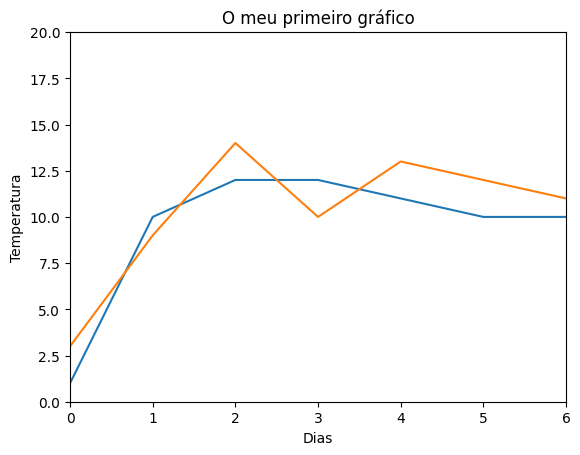

In [456]:
import matplotlib.pyplot as plt

plt.axis((0, 6, 0, 20))

x = [0, 1, 2, 3, 4, 5,6]
y = [1, 10, 12, 12, 11, 10, 10]
b = [3, 9, 14, 10, 13, 12, 11]

plt.plot(x, y, b)  # gráfico de linhas
# plt.scatter(x,y)  # gráfico de pontos
#plt.bar(x,y)  # gráfico de barras
plt.title("O meu primeiro gráfico")
plt.xlabel("Dias")
plt.ylabel("Temperatura")

# Showing plot
plt.show()


In [459]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib

df = pd.read_csv('music.csv')

inputs = df.drop(['genre'], axis = 'columns')
target = df['genre']
model = DecisionTreeClassifier(random_state=5)

# getting data using information integer by inputs and targets
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size = 0.8,  stratify=target, random_state=5) 

model.fit(inputs_train, target_train)

# getting data using information integer by inputs and targets
predictions = model.predict(inputs_test) 
# getting gener used by an age and gender using
#predictions = model.predict([ [4, 0], [27, 1] ]) 
# accurancy of data using some informations, line 8
score = accuracy_score(target_test, predictions)
score

0.26666666666666666